<a href="https://colab.research.google.com/github/daniel199316/ModeladoYsimulacion/blob/master/Codigo_propuesto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.style
matplotlib.style.use('classic')
import numpy as np
from matplotlib import pyplot as plt


## Método de Euler

<span style="color:red"> **Es un método iterativo que a partir de un valor inicial emplea la derivada para conocer la pendiente de la recta tangente en ese punto, para luego trazar una recta hasta el siguente valor con un incremento h.** </span>

$x_{i+1} = x_{i} + hf_{(t_i, x_i)}$

In [0]:
def euler( derivadas, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):
    
      x.append (xi)
      t.append (ti)
  
      xi = xi + h*derivadas(ti,xi,params)
      ti = ti + h
    return t, x  

## Método de Runge-Kutta de Cuarto Orden

<span style="color:red"> ** Es un método iterativo para la aproximación de soluciones de ecuaciones diferenciales ordinarias.** </span>

$k_1 = f_{(t_i, x_i)}$

$k_2 = f_{(t_i + \frac{h}{2}, x_i + \frac{k_1}{2})}$

$k_3 = f_{(t_i + \frac{h}{2}, x_i + \frac{k_2}{2})}$

$k_4 = f_{(t_i + h, x_i + k_3)}$


$x_{i+1} = x_i + \frac{h}{6}(k_1 + k_2 + k_3 + k_4)$

In [0]:
def rk4( derivadas, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):

      x.append (xi)
      t.append (ti)
      k1 = derivadas( ti,xi,params)
      k2 = derivadas( ti + 0.5*h,xi + 0.5*k1*h,params )
      k3 = derivadas( ti + 0.5*h,xi + 0.5*k2*h,params)
      k4 = derivadas( ti + h,xi + k3*h,params) 

      xi = xi + h*(k1 + 2*k2 + 2*k3 + k4)/6
      ti = ti + h
    return t, x

## <span style="color:red"> Ex 1.</span> Circuito RC serie  

Dada la ecuación diferencial:

$\dot x = \frac{V0}{R} - \frac{X}{RC}$

Siendo $R$ la resistencia del circuito, $C$ el valor de la capacitancia y $V0$ el voltaje de la fuente contante.

Esta ecuacion diferencial nos permite describir el comportamiento de un circuito RC en funcion del tiempo y  la corriente que fluye por el,por medio de una grafica veremos mas facilmente dicho comportamiento.

In [0]:
def sistema_1(t,x,v0):
    #x_dot =v0*c
    x_dot = v0-x
    #x_dot = (v0/r)-(x/c*r)
    return x_dot

## <span style="color:red"></span> Declaracion de variables

h = esta variable me permite asignar un valor al paso de integracion y posteriormente modificarlo para visualizar cómo varía la precisión de los resultados numéricos a medida que éste se hace más pequeño.

X0 = el voltaje inicial con el que se encuentra cargado el capacitor.
V0 = voltaje de la fuente DC.
tini y tfin son el espacio de tiempo en el que quiero observar el comportamiento del circuito.

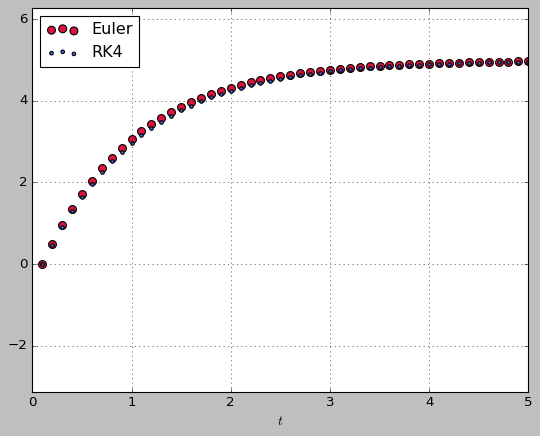

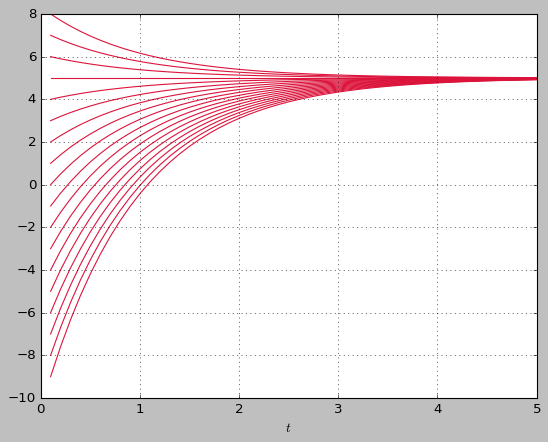

In [0]:
h = 0.1
tini = 0.1
tfin = 5
x0 = 0
r=6000
v0=5
c=1e-3

t1,x1 = euler( sistema_1, h, tini, tfin, x0, v0)
t2,x2 = rk4( sistema_1, h, tini, tfin, x0, v0)

#t = np.linspace(0,10,100) 
#x = x0 - np.cos(x)

plt.figure()
# gráfica de euler:
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
# gráfica de rk4:
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 10)
# gráfica de analitica:
#plt.plot(  t, x, 'black', label = 'Analytical', linewidth = 2)


plt.xlim([0, tfin])
plt.ylim([-3.14, 6.28])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()

for i in range(-9,9,1):
    x0=i
    t1,x1 = euler( sistema_1, h, tini, tfin, x0, v0 )
    plt.plot( t1, x1, c = 'crimson')

plt.xlim([0, tfin])
#plt.ylim([-3.14, 6.28])
plt.xlabel(r'$t$')
plt.grid()
plt.show()